<a href="https://colab.research.google.com/github/iambaangkok/261459-Deep-Learning/blob/master/269459_Linear_regression_(Pytorch).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
%reset -f
import torch
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

# 261459 Linear regression

Given 6 examples with targets as shown in the table.
   
   | Data | (1) | (2)  | (3) | (4) | (5) | (6)  |
   | --- | --- | ---| ---| ---| ---| ---|
  | $x_1$ | 0 | 1 | 2 | 3 | 4 | 5 |
  | $x_2$ | 0 | 2 | 1 | 4 | 4 | 3 |  
  | $y$   | 0 | 1 | 2 | 3 | 5 | 6 |  

Find the linear regression $f(x_1, x_2) = w_1 x_1 + w_2 x_2 + b$ 

## 1. Linear regression using Normal equation

use the Normal equation $\mathbf{w} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}$.

### Create design matrix & label

In [9]:
X = torch.tensor([[0., 0.],[1., 2.],[2., 1.],[3., 4.],[4.,4.],[5.,3.]]) # Design matrix
Y = torch.tensor([0.,1.,2.,3.,5.,6.])  # Target
print('X =',X)
print('Y =',Y, '\tY.shape=', Y.shape)

X = tensor([[0., 0.],
        [1., 2.],
        [2., 1.],
        [3., 4.],
        [4., 4.],
        [5., 3.]])
Y = tensor([0., 1., 2., 3., 5., 6.]) 	Y.shape= torch.Size([6])


In [10]:
Y = Y[:,None]  # reshape Y
# Y.reshape()
# Y.view()
print('Y =',Y, '\tY.shape=', Y.shape)

Y = tensor([[0.],
        [1.],
        [2.],
        [3.],
        [5.],
        [6.]]) 	Y.shape= torch.Size([6, 1])


### Augmentation

In [11]:
m, n = X.shape
X = torch.cat( (X,torch.ones((m,1))  ), axis=1) 
print ("X = ", X)

X =  tensor([[0., 0., 1.],
        [1., 2., 1.],
        [2., 1., 1.],
        [3., 4., 1.],
        [4., 4., 1.],
        [5., 3., 1.]])


### Normal equation

In [12]:
w = torch.linalg.inv(X.T @ X) @ X.T @ Y    
print('w =', w)
display(Markdown(
    f'Solution is $f(x_1, x_2) = {w[0,0]:.3f} x_1 + {w[1,0]:.3f} x_2 + {w[2,0]:.3f}$'
))

w = tensor([[ 1.2836],
        [-0.0802],
        [-0.1884]])


Solution is $f(x_1, x_2) = 1.284 x_1 + -0.080 x_2 + -0.188$

### Visualizing the plane

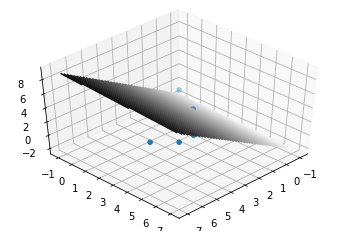

In [15]:
def linear_function(x1, x2):
    return 1.284*x1 - 0.080*x2 -0.188

x1_values = torch.linspace(-1,7,100)  # create a grid
x2_values = torch.linspace(-1,7,100)
X1_values, X2_values = torch.meshgrid(x1_values, x2_values, indexing='ij')

Y_values = linear_function(X1_values, X2_values)
plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X1_values, X2_values, Y_values, 50, cmap='binary')
ax.view_init(45, 45)
ax.scatter3D(X[:,0], X[:,1], X[:,2], cmap='Greens');

## 2. Linear regression using Gradient descent

## Create design matrix & label

We will use augmented Design matrix $\mathbf{X}$ and its label $\mathbf{y}$ from 1.

In [16]:
print(X)
print(Y)

tensor([[0., 0., 1.],
        [1., 2., 1.],
        [2., 1., 1.],
        [3., 4., 1.],
        [4., 4., 1.],
        [5., 3., 1.]])
tensor([[0.],
        [1.],
        [2.],
        [3.],
        [5.],
        [6.]])


## Gradient descent

Note: the code below shows batch gradient descent without any randomization. So, practically, it is not good.

Solution is $f(x_1, x_2) = 1.284 x_1 + -0.080 x_2 + -0.188$

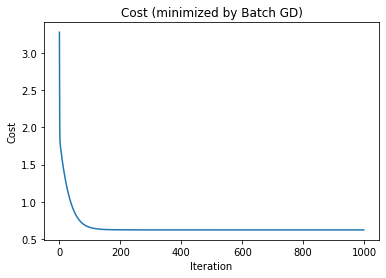

In [17]:
cost = []
alpha = 0.02 # Learning rate
w = torch.zeros((3,1)) 
for t in range(1000):
    dJ = (1/3)*( w.T @ X.T @ X - Y.T @ X )  
    w = w - alpha*dJ.T
    cost.append( torch.linalg.norm(Y - X @ w) )  

display(Markdown(
    f'Solution is $f(x_1, x_2) = {w[0,0]:.3f} x_1 + {w[1,0]:.3f} x_2 + {w[2,0]:.3f}$'
))

plt.figure()
plt.plot(range(0,len(cost)),cost)
plt.title('Cost (minimized by Batch GD)')
plt.xlabel('Iteration')
plt.ylabel('Cost');

### Stochastic gradient descent (SGD)

Solution is $f(x_1, x_2) = 1.274 x_1 + -0.088 x_2 + -0.179$

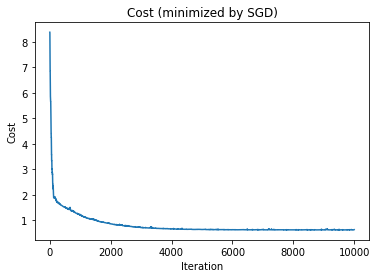

In [ ]:
cost = []
alpha = 0.001 # Learning rate
w = torch.zeros((3,1)) 
torch.manual_seed(123)
for t in range(10000):
  idx = torch.randint(0,len(X),(1,))    
  x = X[idx].reshape(1,-1) # I picked only example
  y = Y[idx].reshape(1,-1)    
  dJ = ( w.T @ x.T @ x - y.T @ x )  
  w = w - alpha*dJ.T
  cost.append( torch.linalg.norm(Y - X @ w) )

display(Markdown(
    f'Solution is $f(x_1, x_2) = {w[0,0]:.3f} x_1 + {w[1,0]:.3f} x_2 + {w[2,0]:.3f}$'
))

plt.figure()
plt.plot(range(0,len(cost)),cost)
plt.title('Cost (minimized by SGD)')
plt.xlabel('Iteration')
plt.ylabel('Cost');

In [ ]:
# Minibatch GD
for epoch in range(10000): # epoch
    Generate list of minibatchs
    for minibatch in Minibatchs: # iteration
      compute gradient from minibatch
      use gradient to update the model

## 3. Linear regression using Gradient descent 

This time we will let Pytorch to compute gradient for us.

True
w1 = 0.4266666769981384 w2 = 0.35999998450279236 b =  0.1133333295583725


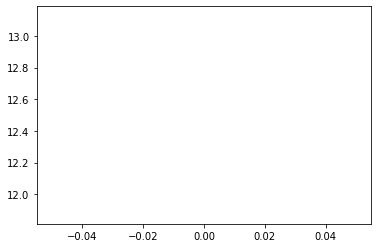

In [ ]:
import torch
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, DataLoader

# Create dataset
X = torch.tensor([[0., 0.],[1., 2.],[2., 1.],[3., 4.],[4.,4.],[5.,3.]]) # Design matrix
Y = torch.tensor([0.,1.,2.,3.,5.,6.]).unsqueeze(1)  # Target
ds = TensorDataset(X,Y)
ds_loader = DataLoader(ds, batch_size=6,shuffle=False)

learning_rate = 0.02

w = torch.zeros((2,1), requires_grad=True)
b = torch.tensor(0.0, requires_grad=True) 

losses = []

for epoch in range(1000):
  for Xb, yb in ds_loader:
    yhatb = Xb @ w + b    
    loss = (yhatb - yb).pow(2).mean()
    loss.backward()     
    
    with torch.no_grad(): # requires will be False
      w -= learning_rate*w.grad
      b -= learning_rate*b.grad
      w.grad.zero_()
      b.grad.zero_()
      losses.append(loss.numpy())
      print(w.requires_grad)    

      

print('w1 =', w[0,0].item(), 'w2 =', w[1,0].item(), 'b = ', b.item())

plt.plot(losses);
